<a href="https://colab.research.google.com/github/ganeshIIT/airbnb/blob/master/airbnb_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install pyodbc -q

# !curl https://packages.microsoft.com/keys/microsoft.asc | apt-key add -
# !curl https://packages.microsoft.com/config/ubuntu/16.04/prod.list > /etc/apt/sources.list.d/mssql-release.list
# !sudo apt-get update
# !sudo ACCEPT_EULA=Y apt-get -q -y install msodbcsql17

In [1]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc

import helper
import dataloader

In [2]:
plt.style.use('seaborn')

/var/folders/74/ndv7v28d3078l2cq22t43pkc0000gn/T/ipykernel_23893/240305066.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
cstring = helper.get_connstring()
with pyodbc.connect(cstring) as conn:
    query = "SELECT * from listings"
    df = pd.read_sql(query, conn, index_col='id')

/var/folders/74/ndv7v28d3078l2cq22t43pkc0000gn/T/ipykernel_23893/372577052.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn, index_col='id')


In [4]:
df.columns

Index(['listing_id', 'country', 'province', 'city', 'listing_url', 'source',
       'name', 'host_id', 'host_name', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores

In [7]:
df.head()

,listing_id,country,province,city,listing_url,source,name,host_id,host_name,host_since,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
1,108061,united-states,nc,asheville,https://www.airbnb.com/rooms/108061,city scrape,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,2010-12-16,...,4.79,4.84,4.48,None,False,2,2,0,0,0.67
2,155305,united-states,nc,asheville,https://www.airbnb.com/rooms/155305,city scrape,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,2011-06-26,...,4.74,4.93,4.54,None,True,7,1,2,4,2.72
3,156805,united-states,nc,asheville,https://www.airbnb.com/rooms/156805,previous scrape,"Private Room ""Ader"" at BPS Hostel",746673,BonPaul,2011-06-26,...,4.61,4.84,4.46,None,True,7,1,2,4,0.50
4,156926,united-states,nc,asheville,https://www.airbnb.com/rooms/156926,city scrape,"Mixed Dorm ""Top Bunk #1"" at BPS Hostel",746673,BonPaul,2011-06-26,...,4.80,4.79,4.79,None,True,7,1,2,4,2.34
5,197263,united-states,nc,asheville,https://www.airbnb.com/rooms/197263,city scrape,Tranquil Room & Private Bath,961396,Timo,2011-08-12,...,4.92,4.82,4.98,None,False,2,1,1,0,0.49


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
host_listings_count,273659.0,111.752707,523.896911,0.00000,1.000000,3.000000,17.000000,4129.00000
host_total_listings_count,273659.0,161.927863,751.308931,0.00000,2.000000,4.000000,24.000000,20000.00000
latitude,274790.0,34.674900,6.702125,18.92025,30.490213,34.213663,40.678128,47.74800
longitude,274790.0,-104.777311,25.478966,-159.71462,-118.426558,-104.984360,-80.130310,-70.91325
accommodates,274790.0,4.317235,2.941513,0.00000,2.000000,4.000000,6.000000,16.00000
bedrooms,251935.0,1.837180,1.184831,1.00000,1.000000,1.000000,2.000000,24.00000
beds,270696.0,2.410305,1.954360,1.00000,1.000000,2.000000,3.000000,132.00000
price,274790.0,284.209152,859.946269,0.00000,97.000000,159.000000,275.000000,100000.00000
minimum_nights,274790.0,12.589880,28.367101,1.00000,2.000000,3.000000,30.000000,1250.00000
availability_30,274790.0,11.175996,10.808694,0.00000,0.000000,9.000000,21.000000,30.00000


In [9]:
df.nunique().sort_values()

country                                              1
host_is_superhost                                    2
has_availability                                     2
host_has_profile_pic                                 2
host_identity_verified                               2
instant_bookable                                     2
source                                               2
room_type                                            4
host_response_time                                   4
host_verifications                                  10
accommodates                                        17
calendar_last_scraped                               18
province                                            19
bedrooms                                            23
calculated_host_listings_count_shared_rooms         31
city                                                31
availability_30                                     31
beds                                                42
number_of_

In [10]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [14]:
df['reviews_per_month'].describe()

count    223769.000000
mean          1.706585
std           2.006504
min           0.010000
25%           0.340000
50%           1.050000
75%           2.500000
max         190.480000
Name: reviews_per_month, dtype: float64

In [15]:
df['reviews_per_month'].median()

1.05

<AxesSubplot: >

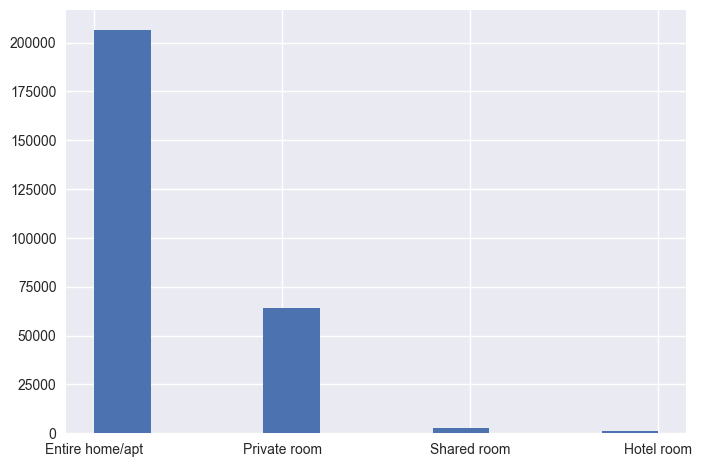

In [17]:
df['room_type'].hist()